In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Final_Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Final_Dataset/Verticillium wilt/dis_leaf (102)_iaip.jpg
/content/drive/MyDrive/Final_Dataset/Verticillium wilt/dis_leaf (126)_iaip.jpg
/content/drive/MyDrive/Final_Dataset/Verticillium wilt/dis_leaf (123)_iaip.jpg
/content/drive/MyDrive/Final_Dataset/Verticillium wilt/dis_leaf (122)_iaip.jpg
/content/drive/MyDrive/Final_Dataset/Verticillium wilt/dis_leaf (125)_iaip.jpg
/content/drive/MyDrive/Final_Dataset/Verticillium wilt/dis_leaf (129)_iaip.jpg
/content/drive/MyDrive/Final_Dataset/Verticillium wilt/dis_leaf (128)_iaip.jpg
/content/drive/MyDrive/Final_Dataset/Verticillium wilt/dis_leaf (101)_iaip.jpg
/content/drive/MyDrive/Final_Dataset/Verticillium wilt/dis_leaf (127)_iaip.jpg
/content/drive/MyDrive/Final_Dataset/Verticillium wilt/dis_leaf (162)_iaip.jpg
/content/drive/MyDrive/Final_Dataset/Verticillium wilt/dis_leaf (132)_iaip.jpg
/content/drive/MyDrive/Final_Dataset/Verticillium wilt/dis_leaf (139)_iaip.jpg
/content/drive/MyDrive/Final_Dataset/Verticillium wi

In [ ]:
train_dir="/content/drive/MyDrive/Final_Dataset"

In [ ]:
Classes = ['Aphids','Bacterial Blight','Curly Virus','Healthy','Powdery Mildew','Verticillium wilt']

In [ ]:
import cv2
import numpy as np
train_data = []
img_size=224
def get_training_data():
    for label in  Classes:
        path=os.path.join(train_dir, label)
        class_num = Classes.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                train_data.append([resized_arr, class_num])
            except Exception as e:
                pass

In [ ]:
get_training_data()

In [ ]:
print(len(train_data))

1199


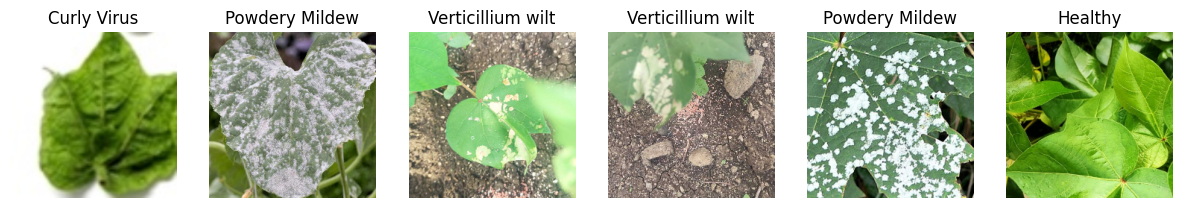

In [ ]:
import cv2
import os
import random
import matplotlib.pyplot as plt

# Set the path to your dataset directory
dataset_dir = '/content/drive/MyDrive/Final_Dataset'

# List the classes (subdirectories) in your dataset directory
classes = os.listdir(dataset_dir)

# Create a figure to display the 6 random images
fig, axes = plt.subplots(1, 6, figsize=(15, 5))

# Iterate over 6 random classes
for i in range(6):
    class_name = random.choice(classes)  # Randomly select a class
    class_dir = os.path.join(dataset_dir, class_name)

    # List all image files in the class directory
    images = os.listdir(class_dir)

    # Randomly select an image from the class
    image_name = random.choice(images)
    image_path = os.path.join(class_dir, image_name)

    # Read and display the selected image
    image = cv2.imread(image_path)
    image=cv2.resize(image,(224,224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    axes[i].imshow(image)
    axes[i].set_title(class_name)
    axes[i].axis('off')

plt.show()

In [ ]:
for label in Classes:
    print(Classes.index(label))

0
1
2
3
4
5


In [ ]:
x=[]
y=[]
for i,j in train_data:
  x.append(i)
  y.append(j)
x=np.array(x).reshape(-1,img_size, img_size,3)

In [ ]:
x.shape

(1199, 224, 224, 3)

In [ ]:
x=x/255.0

In [ ]:
y=np.array(y)

In [ ]:
print(y.shape)
print(y)

(1199,)
[0 0 0 ... 5 5 5]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=True,test_size=0.2)

In [ ]:
print(x_train.shape)

(959, 224, 224, 3)


In [ ]:
print(y_test)

[2 3 2 0 5 4 1 5 4 2 5 0 3 5 0 4 3 4 2 5 5 2 1 2 2 4 2 1 4 1 5 2 4 2 0 4 2
 1 2 0 3 5 0 0 1 3 4 5 4 3 5 4 5 3 2 1 2 3 2 5 5 0 4 1 0 5 4 1 4 3 1 4 4 4
 0 3 0 3 5 1 1 2 0 2 3 2 3 1 1 2 4 4 4 3 0 2 0 1 4 1 3 5 1 1 4 0 3 4 0 1 1
 2 4 0 5 0 3 1 1 1 0 0 5 4 1 0 0 2 1 3 4 4 1 0 4 5 0 5 2 3 3 2 3 1 0 1 1 3
 5 2 4 1 3 2 2 1 0 5 4 4 5 0 2 3 0 5 1 5 1 3 4 3 5 1 5 1 4 0 3 5 1 0 1 3 4
 2 4 3 5 4 4 4 0 3 1 2 0 1 3 0 2 4 1 3 3 1 4 4 4 0 0 0 0 0 4 1 0 2 1 4 0 3
 5 1 4 5 4 1 2 2 2 2 0 0 1 3 4 2 5 2]


In [ ]:
from tensorflow.keras.utils import to_categorical
# Assuming y_train contains integer labels (0 to 5 for 6 classes)
y_train= to_categorical(y_train, num_classes=6)

In [ ]:
from tensorflow.keras.utils import to_categorical

# Assuming y_train contains integer labels (0 to 5 for 6 classes)
y_test= to_categorical(y_test, num_classes=6)

In [ ]:
print(x_train.shape,y_test.shape)

(959, 224, 224, 3) (240, 6)


**MobileNet**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import utils
import os
from keras.layers import Flatten, Dense
from keras.models import Model
from tensorflow.keras.utils import img_to_array,load_img
from keras.preprocessing.image import  ImageDataGenerator
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy
base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)


x = Dense(units=6 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)
#model = Model(inputs=base_model.input, outputs=output_layer)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128 

In [ ]:
mnet= model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
30/30 [==============================] - 6s 141ms/step - loss: 1.8121 - accuracy: 0.8050 - val_loss: 0.3947 - val_accuracy: 0.9208
Epoch 2/15
30/30 [==============================] - 2s 55ms/step - loss: 0.0934 - accuracy: 0.9864 - val_loss: 0.2844 - val_accuracy: 0.9583
Epoch 3/15
30/30 [==============================] - 2s 55ms/step - loss: 3.8905e-04 - accuracy: 1.0000 - val_loss: 0.1845 - val_accuracy: 0.9625
Epoch 4/15
30/30 [==============================] - 2s 55ms/step - loss: 2.4332e-05 - accuracy: 1.0000 - val_loss: 0.1680 - val_accuracy: 0.9542
Epoch 5/15
30/30 [==============================] - 2s 55ms/step - loss: 1.0298e-05 - accuracy: 1.0000 - val_loss: 0.1647 - val_accuracy: 0.9542
Epoch 6/15
30/30 [==============================] - 2s 55ms/step - loss: 5.7031e-06 - accuracy: 1.0000 - val_loss: 0.1629 - val_accuracy: 0.9542
Epoch 7/15
30/30 [==============================] - 2s 65ms/step - loss: 4.0546e-06 - accuracy: 1.0000 - val_loss: 0.1619 - val_accuracy:

In [ ]:
#Evaluate the model on your test data.
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

8/8 [==============================] - 0s 49ms/step - loss: 0.1559 - accuracy: 0.9583
Test accuracy: 95.83%


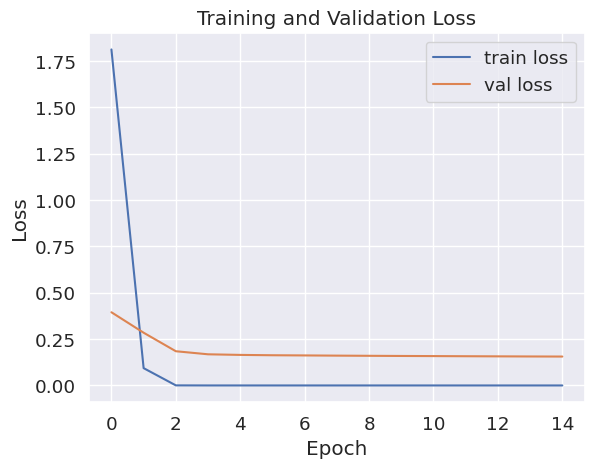

In [ ]:
# Plot the loss
import matplotlib.pyplot as plt
plt.plot(mnet.history['loss'], label='train loss')
plt.plot(mnet.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.savefig('LossVal_loss.png')
plt.show()

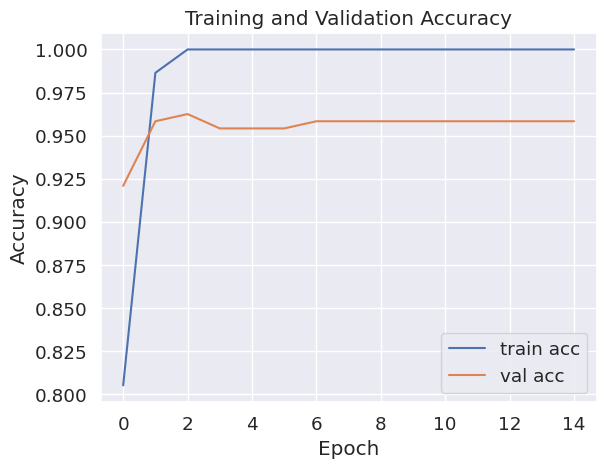

In [ ]:
# Plot the accuracy
plt.plot(mnet.history['accuracy'], label='train acc')
plt.plot(mnet.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.savefig('AccVal_acc.png')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have already trained your model and obtained predictions for both train and test sets
train_predictions = model.predict(x_train)  # Replace 'model' with your trained model
test_predictions = model.predict(x_test)

# Convert predictions to class labels
train_pred_labels = np.argmax(train_predictions, axis=1)
test_pred_labels = np.argmax(test_predictions, axis=1)

# True labels
train_true_labels = np.argmax(y_train, axis=1)
test_true_labels = np.argmax(y_test, axis=1)

# Calculate metrics for the training dataset
train_accuracy = accuracy_score(train_true_labels, train_pred_labels)
train_precision = precision_score(train_true_labels, train_pred_labels, average='weighted')
train_recall = recall_score(train_true_labels, train_pred_labels, average='weighted')
train_f1_score = f1_score(train_true_labels, train_pred_labels, average='weighted')
train_confusion = confusion_matrix(train_true_labels, train_pred_labels)

# Calculate metrics for the testing dataset
test_accuracy = accuracy_score(test_true_labels, test_pred_labels)
test_precision = precision_score(test_true_labels, test_pred_labels, average='weighted')
test_recall = recall_score(test_true_labels, test_pred_labels, average='weighted')
test_f1_score = f1_score(test_true_labels, test_pred_labels, average='weighted')
test_confusion = confusion_matrix(test_true_labels, test_pred_labels)

# Print the metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-Score: {train_f1_score:.4f}")
print("Confusion Matrix:")
print(train_confusion)

print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1_score:.4f}")
print("Confusion Matrix:")
print(test_confusion)

8/8 [==============================] - 0s 37ms/step
Training Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Confusion Matrix:
[[158   0   0   0   0   0]
 [  0 154   0   0   0   0]
 [  0   0 161   0   0   0]
 [  0   0   0 165   0   0]
 [  0   0   0   0 153   0]
 [  0   0   0   0   0 168]]

Testing Metrics:
Accuracy: 0.9583
Precision: 0.9600
Recall: 0.9583
F1-Score: 0.9584
Confusion Matrix:
[[40  0  1  0  1  0]
 [ 3 43  0  0  0  0]
 [ 0  0 37  0  1  0]
 [ 0  0  0 34  1  0]
 [ 0  0  0  0 47  0]
 [ 0  0  0  3  0 29]]


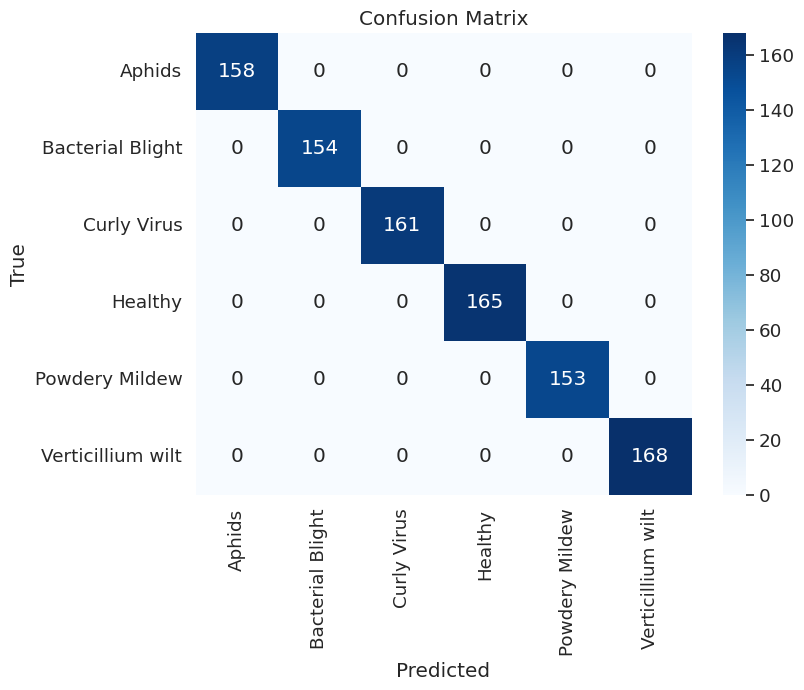

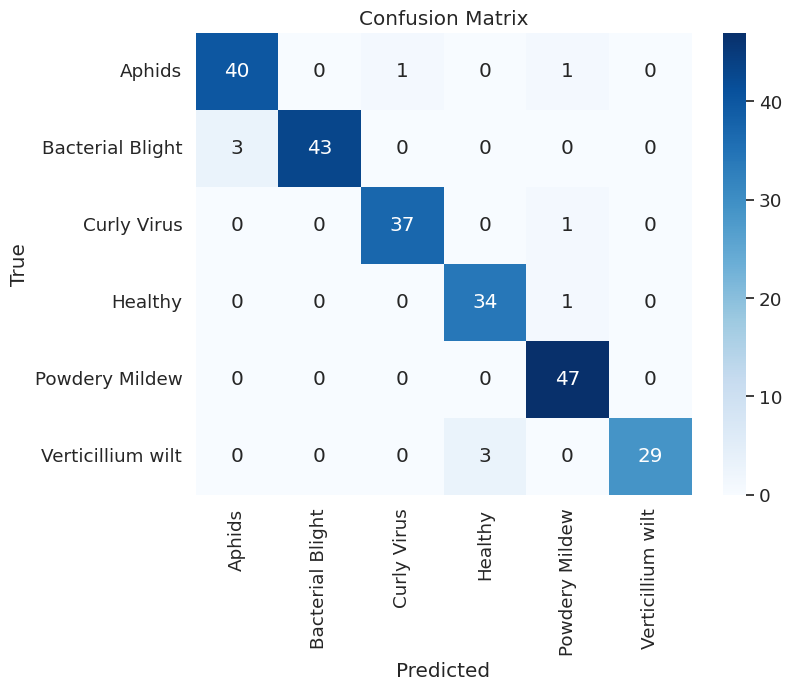

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# ... (previous code for predictions and metrics calculation) ...

# Define class names
class_names = ['Aphids','Bacterial Blight','Curly Virus','Healthy','Powdery Mildew','Verticillium wilt'] # Replace with your actual class names

# Create confusion matrix for training dataset
train_confusion = confusion_matrix(train_true_labels, train_pred_labels)

# Create confusion matrix for testing dataset
test_confusion = confusion_matrix(test_true_labels, test_pred_labels)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(
        cm,
        annot=True,
        cmap='Blues',  # You can choose other colormaps like 'viridis', 'coolwarm', etc.
        xticklabels=labels,
        yticklabels=labels,
        fmt='g'
    )
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix for training dataset
plot_confusion_matrix(train_confusion, class_names)

# Plot confusion matrix for testing dataset
plot_confusion_matrix(test_confusion, class_names)

In [ ]:
from tensorflow.keras.models import load_model
model.save('model_mobilenet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 922ms/step
Predicted Disease: Bacterial Blight
Disease Scores: [[4.3591458e-10 6.0367113e-01 1.6498547e-06 6.5298982e-02 2.0712696e-01
  1.2390126e-01]]


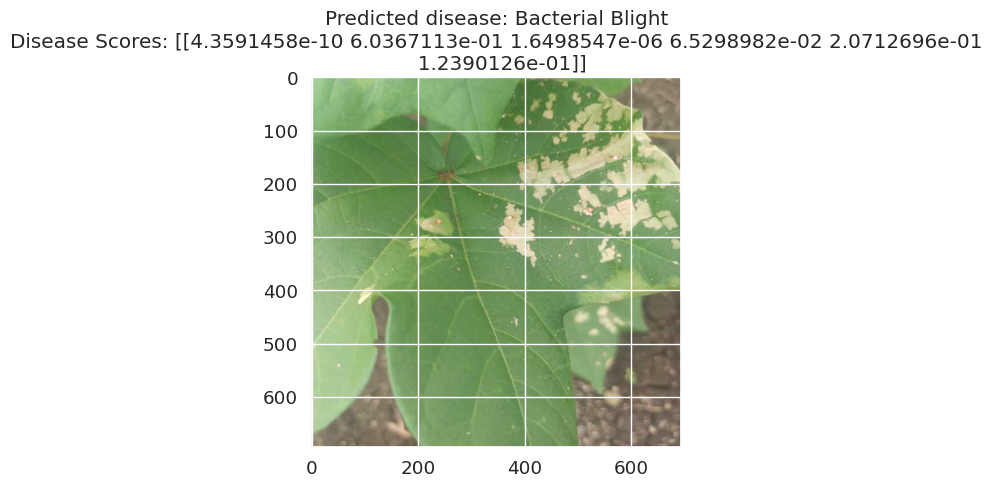

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load your pre-trained MobileNet model (or your custom model).
model = tf.keras.models.load_model('/content/model_mobilenet.h5')  # Replace 'your_model_path.h5' with the path to your trained model.

# Define a dictionary to map class indices to human-readable emotion labels.
disease_labels = {
    0: "Aphids",
    1: "Bacterial Blight",
    2: "Curly Virus",
    3: "Healthy",
    4: "Powdery Mildew",
    5: "Verticillium wilt"
}

# Define a function to predict the emotion label and scores from an image file path.
def predict_disease(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # Resize the image to match the input size of your model.
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    predictions = model.predict(x)
    predicted_label = disease_labels[np.argmax(predictions)]  # Get the label with the highest score.
    return predicted_label, predictions

# Define a function to display the image, predicted emotion label, and scores.
def display_image_with_disease(image_path, predicted_label, predicted_disease_scores):
    img = image.load_img(image_path)
    plt.imshow(img)
    plt.title(f"Predicted disease: {predicted_label}\nDisease Scores: {predicted_disease_scores}")
    plt.show()

image_path = '/content/drive/MyDrive/Final_Dataset/Verticillium wilt/dis_leaf (102)_iaip.jpg'
predicted_label, predicted_disease_scores = predict_disease(image_path)
print("Predicted Disease:", predicted_label)
print("Disease Scores:", predicted_disease_scores)

# Display the image with predicted emotion label and scores.
display_image_with_disease(image_path, predicted_label, predicted_disease_scores)

**Custom CNN**

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.preprocessing import image
from keras.losses import categorical_crossentropy

In [ ]:
model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax')
])

In [ ]:
# Compile the model
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)       

In [ ]:
cm= model2.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
30/30 [==============================] - 11s 178ms/step - loss: 1.7536 - accuracy: 0.2127 - val_loss: 1.5359 - val_accuracy: 0.3000
Epoch 2/15
30/30 [==============================] - 2s 71ms/step - loss: 1.4957 - accuracy: 0.3650 - val_loss: 1.3203 - val_accuracy: 0.4542
Epoch 3/15
30/30 [==============================] - 2s 59ms/step - loss: 1.3944 - accuracy: 0.4432 - val_loss: 1.3167 - val_accuracy: 0.5208
Epoch 4/15
30/30 [==============================] - 2s 54ms/step - loss: 1.1562 - accuracy: 0.5474 - val_loss: 1.0709 - val_accuracy: 0.5708
Epoch 5/15
30/30 [==============================] - 2s 53ms/step - loss: 0.9843 - accuracy: 0.6257 - val_loss: 0.9946 - val_accuracy: 0.6333
Epoch 6/15
30/30 [==============================] - 2s 55ms/step - loss: 0.8331 - accuracy: 0.7028 - val_loss: 0.8762 - val_accuracy: 0.7042
Epoch 7/15
30/30 [==============================] - 2s 63ms/step - loss: 0.7174 - accuracy: 0.7529 - val_loss: 0.7813 - val_accuracy: 0.7125
Epoch 8/15


In [ ]:
#Evaluate the model on your test data.
test_loss, test_accuracy = model2.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

8/8 [==============================] - 0s 27ms/step - loss: 1.0501 - accuracy: 0.7708
Test accuracy: 77.08%


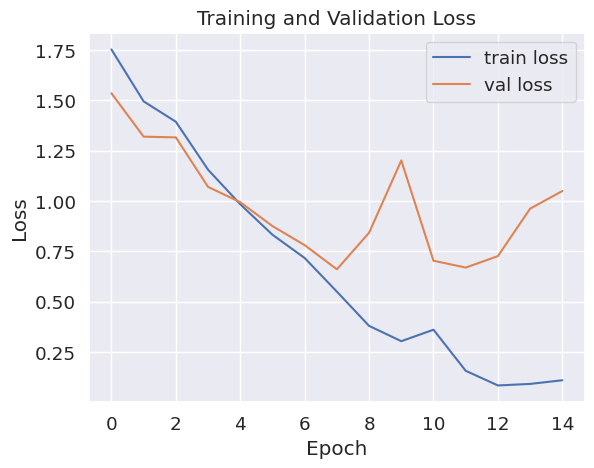

In [ ]:
# Plot the loss
import matplotlib.pyplot as plt
plt.plot(cm.history['loss'], label='train loss')
plt.plot(cm.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.savefig('LossVal_loss.png')
plt.show()

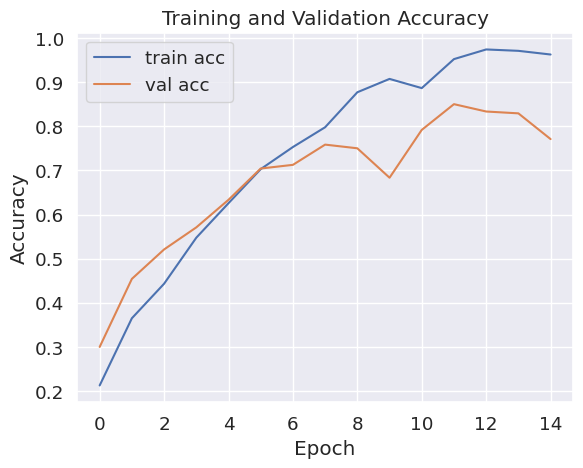

In [ ]:
# Plot the accuracy
plt.plot(cm.history['accuracy'], label='train acc')
plt.plot(cm.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.savefig('AccVal_acc.png')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have already trained your model and obtained predictions for both train and test sets
train_predictions = model2.predict(x_train)  # Replace 'model' with your trained model
test_predictions = model2.predict(x_test)

# Convert predictions to class labels
train_pred_labels = np.argmax(train_predictions, axis=1)
test_pred_labels = np.argmax(test_predictions, axis=1)

# True labels
train_true_labels = np.argmax(y_train, axis=1)
test_true_labels = np.argmax(y_test, axis=1)

# Calculate metrics for the training dataset
train_accuracy = accuracy_score(train_true_labels, train_pred_labels)
train_precision = precision_score(train_true_labels, train_pred_labels, average='weighted')
train_recall = recall_score(train_true_labels, train_pred_labels, average='weighted')
train_f1_score = f1_score(train_true_labels, train_pred_labels, average='weighted')
train_confusion = confusion_matrix(train_true_labels, train_pred_labels)

# Calculate metrics for the testing dataset
test_accuracy = accuracy_score(test_true_labels, test_pred_labels)
test_precision = precision_score(test_true_labels, test_pred_labels, average='weighted')
test_recall = recall_score(test_true_labels, test_pred_labels, average='weighted')
test_f1_score = f1_score(test_true_labels, test_pred_labels, average='weighted')
test_confusion = confusion_matrix(test_true_labels, test_pred_labels)

# Print the metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-Score: {train_f1_score:.4f}")
print("Confusion Matrix:")
print(train_confusion)

print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1_score:.4f}")
print("Confusion Matrix:")
print(test_confusion)

8/8 [==============================] - 0s 18ms/step
Training Metrics:
Accuracy: 0.9020
Precision: 0.9232
Recall: 0.9020
F1-Score: 0.9057
Confusion Matrix:
[[136   0   0  22   0   0]
 [  2 132   0  20   0   0]
 [  1   2 152   6   0   0]
 [  0   2   0 163   0   0]
 [  5   0   0  19 125   4]
 [  4   0   1   6   0 157]]

Testing Metrics:
Accuracy: 0.7708
Precision: 0.8193
Recall: 0.7708
F1-Score: 0.7794
Confusion Matrix:
[[28  4  2  7  0  1]
 [ 3 32  1  9  0  1]
 [ 1  4 27  5  0  1]
 [ 1  0  0 34  0  0]
 [ 1  2  0  5 39  0]
 [ 0  1  0  6  0 25]]


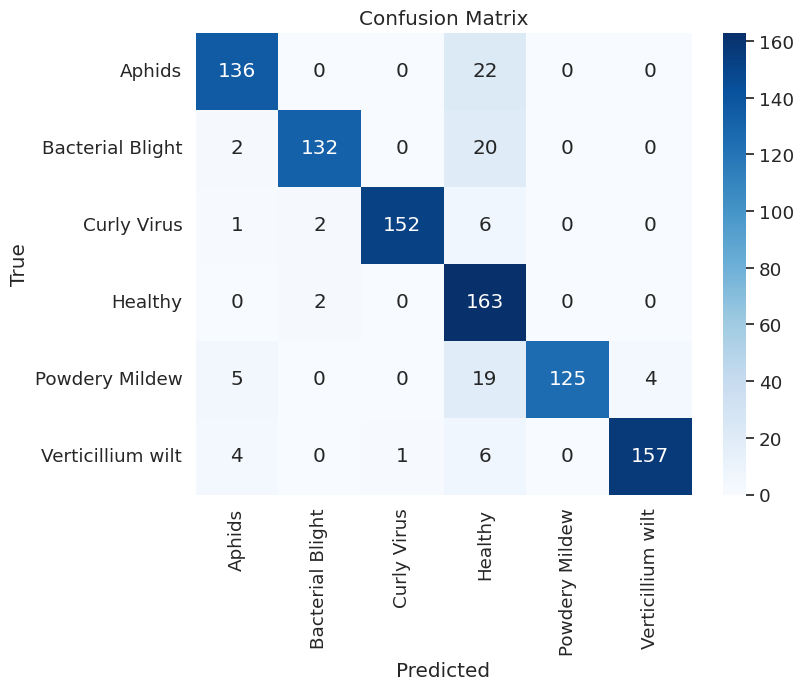

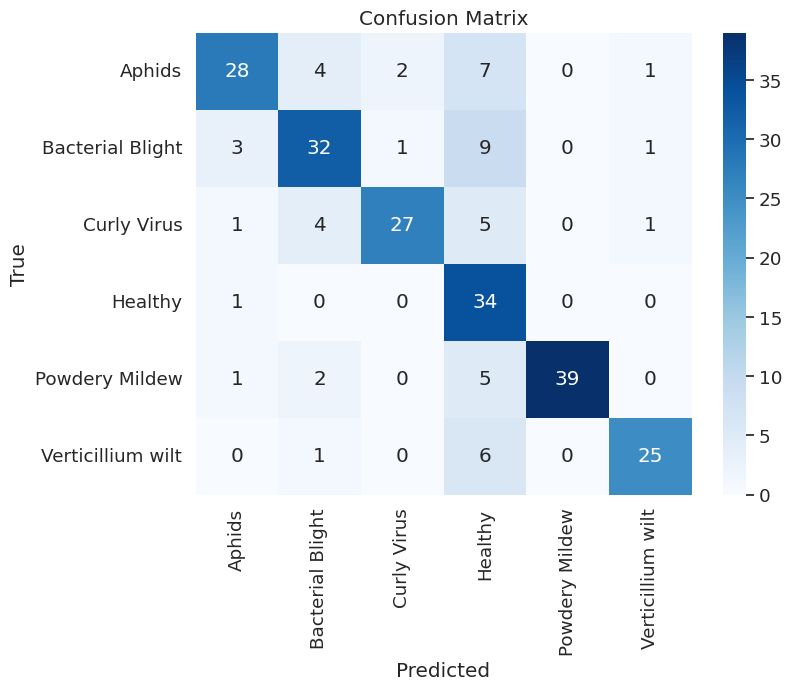

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# ... (previous code for predictions and metrics calculation) ...

# Define class names
class_names = ['Aphids','Bacterial Blight','Curly Virus','Healthy','Powdery Mildew','Verticillium wilt'] # Replace with your actual class names

# Create confusion matrix for training dataset
train_confusion = confusion_matrix(train_true_labels, train_pred_labels)

# Create confusion matrix for testing dataset
test_confusion = confusion_matrix(test_true_labels, test_pred_labels)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(
        cm,
        annot=True,
        cmap='Blues',  # You can choose other colormaps like 'viridis', 'coolwarm', etc.
        xticklabels=labels,
        yticklabels=labels,
        fmt='g'
    )
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix for training dataset
plot_confusion_matrix(train_confusion, class_names)

# Plot confusion matrix for testing dataset
plot_confusion_matrix(test_confusion, class_names)

In [ ]:
from tensorflow.keras.models import load_model
model2.save('model_customcnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 398ms/step
Predicted Disease: Powdery Mildew
Disease Scores: [[0. 0. 0. 0. 1. 0.]]


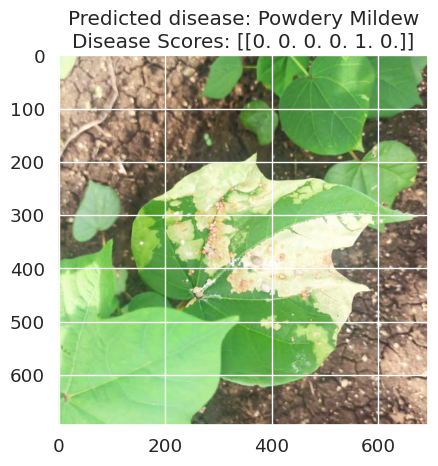

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load your pre-trained MobileNet model (or your custom model).
model = tf.keras.models.load_model('/content/model_customcnn.h5')  # Replace 'your_model_path.h5' with the path to your trained model.

# Define a dictionary to map class indices to human-readable emotion labels.
disease_labels = {
    0: "Aphids",
    1: "Bacterial Blight",
    2: "Curly Virus",
    3: "Healthy",
    4: "Powdery Mildew",
    5: "Verticillium wilt"
}

# Define a function to predict the emotion label and scores from an image file path.
def predict_disease(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # Resize the image to match the input size of your model.
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    predictions = model.predict(x)
    predicted_label = disease_labels[np.argmax(predictions)]  # Get the label with the highest score.
    return predicted_label, predictions

# Define a function to display the image, predicted emotion label, and scores.
def display_image_with_disease(image_path, predicted_label, predicted_disease_scores):
    img = image.load_img(image_path)
    plt.imshow(img)
    plt.title(f"Predicted disease: {predicted_label}\nDisease Scores: {predicted_disease_scores}")
    plt.show()

image_path = '/content/drive/MyDrive/Final_Dataset/Verticillium wilt/dis_leaf (150)_iaip.jpg'
predicted_label, predicted_disease_scores = predict_disease(image_path)
print("Predicted Disease:", predicted_label)
print("Disease Scores:", predicted_disease_scores)

# Display the image with predicted emotion label and scores.
display_image_with_disease(image_path, predicted_label, predicted_disease_scores)

**VGG-16**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Create a VGG16 model with pre-trained weights on ImageNet
base_model3 = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model3.layers:
    layer.trainable = False

# Create a custom head for classification
model3 = Sequential()
model3.add(base_model3)
model3.add(Flatten())
model3.add(Dense(4096, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(4096, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(6, activation='softmax'))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Compile the model
model3.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4096)              102764544 
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout_1 (Dropout)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 6)                 2

In [ ]:
vgg16= model3.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
30/30 [==============================] - 35s 549ms/step - loss: 7.3766 - accuracy: 0.4015 - val_loss: 0.5374 - val_accuracy: 0.8167
Epoch 2/15
30/30 [==============================] - 6s 214ms/step - loss: 0.3960 - accuracy: 0.8540 - val_loss: 0.1979 - val_accuracy: 0.9208
Epoch 3/15
30/30 [==============================] - 6s 200ms/step - loss: 0.2053 - accuracy: 0.9353 - val_loss: 0.1208 - val_accuracy: 0.9583
Epoch 4/15
30/30 [==============================] - 6s 193ms/step - loss: 0.1406 - accuracy: 0.9479 - val_loss: 0.1533 - val_accuracy: 0.9500
Epoch 5/15
30/30 [==============================] - 6s 199ms/step - loss: 0.0974 - accuracy: 0.9687 - val_loss: 0.1332 - val_accuracy: 0.9500
Epoch 6/15
30/30 [==============================] - 6s 197ms/step - loss: 0.1134 - accuracy: 0.9593 - val_loss: 0.1239 - val_accuracy: 0.9542
Epoch 7/15
30/30 [==============================] - 6s 202ms/step - loss: 0.1146 - accuracy: 0.9531 - val_loss: 0.2450 - val_accuracy: 0.9292
Epoch

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have already trained your model and obtained predictions for both train and test sets
train_predictions = model3.predict(x_train)  # Replace 'model' with your trained model
test_predictions = model3.predict(x_test)

# Convert predictions to class labels
train_pred_labels = np.argmax(train_predictions, axis=1)
test_pred_labels = np.argmax(test_predictions, axis=1)

# True labels
train_true_labels = np.argmax(y_train, axis=1)
test_true_labels = np.argmax(y_test, axis=1)

# Calculate metrics for the training dataset
train_accuracy = accuracy_score(train_true_labels, train_pred_labels)
train_precision = precision_score(train_true_labels, train_pred_labels, average='weighted')
train_recall = recall_score(train_true_labels, train_pred_labels, average='weighted')
train_f1_score = f1_score(train_true_labels, train_pred_labels, average='weighted')
train_confusion = confusion_matrix(train_true_labels, train_pred_labels)

# Calculate metrics for the testing dataset
test_accuracy = accuracy_score(test_true_labels, test_pred_labels)
test_precision = precision_score(test_true_labels, test_pred_labels, average='weighted')
test_recall = recall_score(test_true_labels, test_pred_labels, average='weighted')
test_f1_score = f1_score(test_true_labels, test_pred_labels, average='weighted')
test_confusion = confusion_matrix(test_true_labels, test_pred_labels)

# Print the metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-Score: {train_f1_score:.4f}")
print("Confusion Matrix:")
print(train_confusion)

print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1_score:.4f}")
print("Confusion Matrix:")
print(test_confusion)

8/8 [==============================] - 1s 129ms/step
Training Metrics:
Accuracy: 0.9969
Precision: 0.9969
Recall: 0.9969
F1-Score: 0.9969
Confusion Matrix:
[[158   0   0   0   0   0]
 [  0 152   0   2   0   0]
 [  0   0 160   0   1   0]
 [  0   0   0 165   0   0]
 [  0   0   0   0 153   0]
 [  0   0   0   0   0 168]]

Testing Metrics:
Accuracy: 0.9500
Precision: 0.9547
Recall: 0.9500
F1-Score: 0.9507
Confusion Matrix:
[[38  0  0  3  1  0]
 [ 1 44  0  1  0  0]
 [ 0  0 35  1  1  1]
 [ 0  0  0 35  0  0]
 [ 0  0  0  0 46  1]
 [ 0  0  0  2  0 30]]


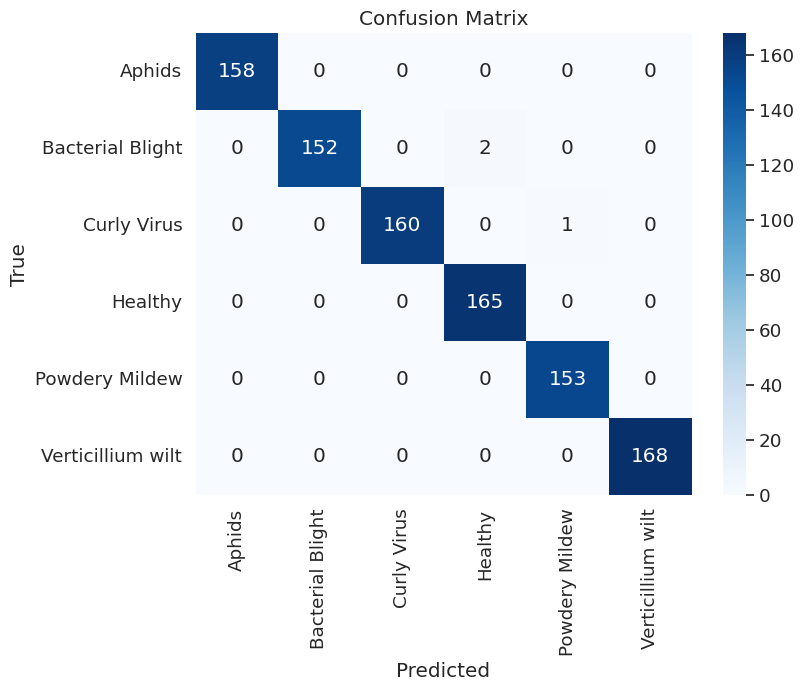

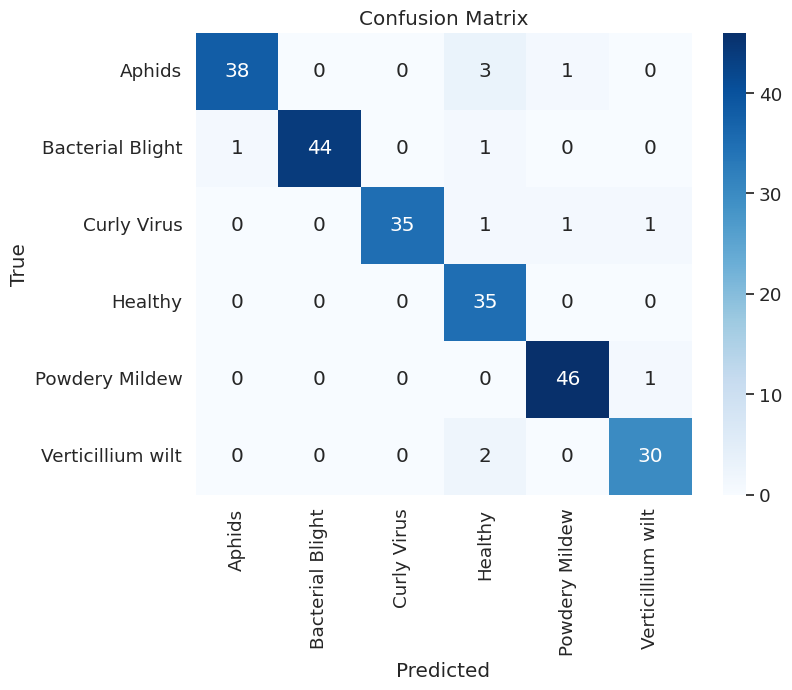

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# ... (previous code for predictions and metrics calculation) ...

# Define class names
class_names = ['Aphids','Bacterial Blight','Curly Virus','Healthy','Powdery Mildew','Verticillium wilt'] # Replace with your actual class names

# Create confusion matrix for training dataset
train_confusion = confusion_matrix(train_true_labels, train_pred_labels)

# Create confusion matrix for testing dataset
test_confusion = confusion_matrix(test_true_labels, test_pred_labels)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(
        cm,
        annot=True,
        cmap='Blues',  # You can choose other colormaps like 'viridis', 'coolwarm', etc.
        xticklabels=labels,
        yticklabels=labels,
        fmt='g'
    )
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix for training dataset
plot_confusion_matrix(train_confusion, class_names)

# Plot confusion matrix for testing dataset
plot_confusion_matrix(test_confusion, class_names)

In [ ]:
#Evaluate the model on your test data.
test_loss, test_accuracy = model3.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

8/8 [==============================] - 1s 125ms/step - loss: 0.1632 - accuracy: 0.9500
Test accuracy: 95.00%


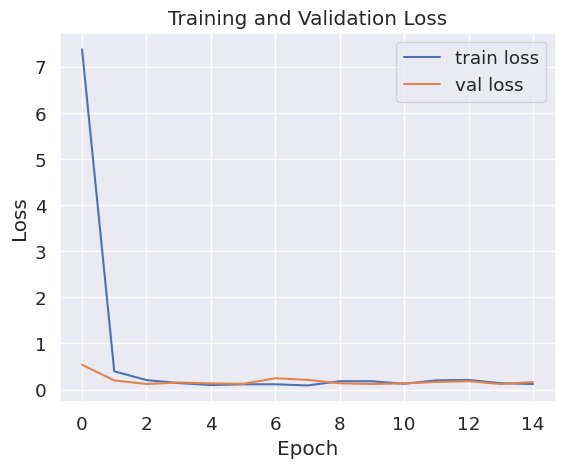

In [ ]:
# Plot the loss
import matplotlib.pyplot as plt
plt.plot(vgg16.history['loss'], label='train loss')
plt.plot(vgg16.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.savefig('LossVal_loss.png')
plt.show()

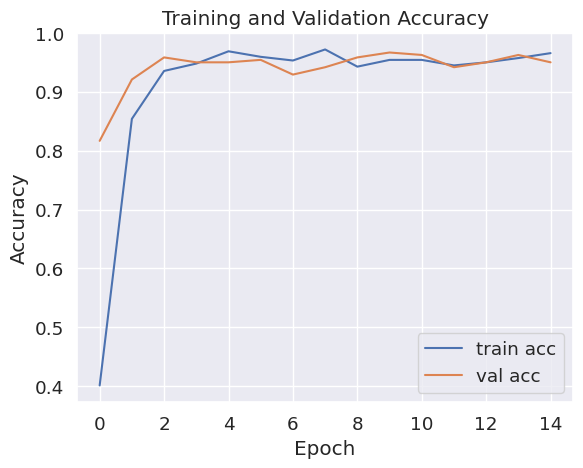

In [ ]:
# Plot the accuracy
plt.plot(vgg16.history['accuracy'], label='train acc')
plt.plot(vgg16.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.savefig('AccVal_acc.png')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model3.save('model_vgg16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 142ms/step
Predicted Disease: Verticillium wilt
Disease Scores: [[0. 0. 0. 0. 0. 1.]]


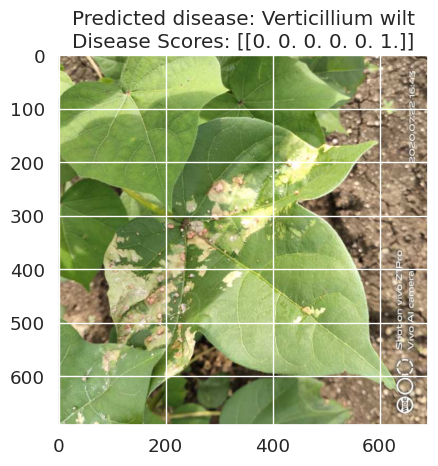

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load your pre-trained MobileNet model (or your custom model).
model = tf.keras.models.load_model('/content/model_vgg16.h5')  # Replace 'your_model_path.h5' with the path to your trained model.

# Define a dictionary to map class indices to human-readable emotion labels.
disease_labels = {
    0: "Aphids",
    1: "Bacterial Blight",
    2: "Curly Virus",
    3: "Healthy",
    4: "Powdery Mildew",
    5: "Verticillium wilt"
}

# Define a function to predict the emotion label and scores from an image file path.
def predict_disease(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # Resize the image to match the input size of your model.
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    predictions = model.predict(x)
    predicted_label = disease_labels[np.argmax(predictions)]  # Get the label with the highest score.
    return predicted_label, predictions

# Define a function to display the image, predicted emotion label, and scores.
def display_image_with_disease(image_path, predicted_label, predicted_disease_scores):
    img = image.load_img(image_path)
    plt.imshow(img)
    plt.title(f"Predicted disease: {predicted_label}\nDisease Scores: {predicted_disease_scores}")
    plt.show()

image_path = '/content/drive/MyDrive/Final_Dataset/Verticillium wilt/dis_leaf (152)_iaip.jpg'
predicted_label, predicted_disease_scores = predict_disease(image_path)
print("Predicted Disease:", predicted_label)
print("Disease Scores:", predicted_disease_scores)

# Display the image with predicted emotion label and scores.
display_image_with_disease(image_path, predicted_label, predicted_disease_scores)

**VGG-19**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
base_model4 = VGG19(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze the layers of the base VGG19 model
for layer in base_model4.layers:
    layer.trainable = False

# Create your custom top layers for classification
x = layers.Flatten()(base_model4.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(6, activation='softmax')(x)

# Create the new model with the VGG19 base and custom top
model4 = models.Model(inputs=base_model4.input, outputs=output)

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
model4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model4.compile(optimizer=optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
vgg19= model4.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
30/30 [==============================] - 12s 319ms/step - loss: 2.3406 - accuracy: 0.4546 - val_loss: 0.6765 - val_accuracy: 0.7583
Epoch 2/15
30/30 [==============================] - 9s 301ms/step - loss: 0.5983 - accuracy: 0.7800 - val_loss: 0.3811 - val_accuracy: 0.8917
Epoch 3/15
30/30 [==============================] - 8s 267ms/step - loss: 0.3821 - accuracy: 0.8707 - val_loss: 0.2732 - val_accuracy: 0.9042
Epoch 4/15
30/30 [==============================] - 8s 264ms/step - loss: 0.3061 - accuracy: 0.9093 - val_loss: 0.2070 - val_accuracy: 0.9375
Epoch 5/15
30/30 [==============================] - 8s 259ms/step - loss: 0.2175 - accuracy: 0.9374 - val_loss: 0.1669 - val_accuracy: 0.9542
Epoch 6/15
30/30 [==============================] - 8s 255ms/step - loss: 0.1585 - accuracy: 0.9499 - val_loss: 0.1400 - val_accuracy: 0.9583
Epoch 7/15
30/30 [==============================] - 8s 255ms/step - loss: 0.1284 - accuracy: 0.9604 - val_loss: 0.1135 - val_accuracy: 0.9625
Epoch

In [ ]:
#Evaluate the model on your test data.
test_loss, test_accuracy = model4.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

8/8 [==============================] - 2s 180ms/step - loss: 0.0926 - accuracy: 0.9708
Test accuracy: 97.08%


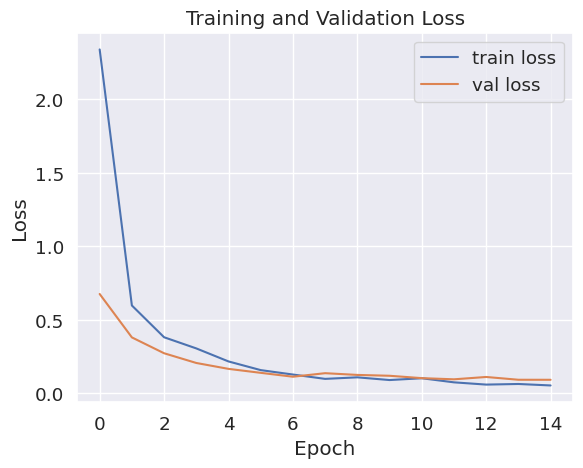

In [ ]:
# Plot the loss
import matplotlib.pyplot as plt
plt.plot(vgg19.history['loss'], label='train loss')
plt.plot(vgg19.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.savefig('LossVal_loss.png')
plt.show()

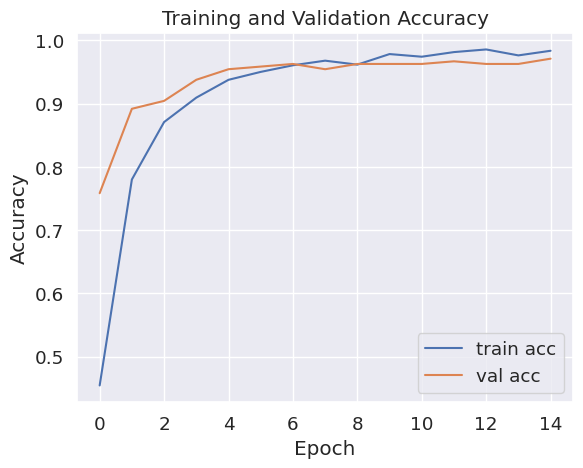

In [ ]:
# Plot the accuracy
plt.plot(vgg19.history['accuracy'], label='train acc')
plt.plot(vgg19.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.savefig('AccVal_acc.png')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have already trained your model and obtained predictions for both train and test sets
train_predictions = model4.predict(x_train)  # Replace 'model' with your trained model
test_predictions = model4.predict(x_test)

# Convert predictions to class labels
train_pred_labels = np.argmax(train_predictions, axis=1)
test_pred_labels = np.argmax(test_predictions, axis=1)

# True labels
train_true_labels = np.argmax(y_train, axis=1)
test_true_labels = np.argmax(y_test, axis=1)

# Calculate metrics for the training dataset
train_accuracy = accuracy_score(train_true_labels, train_pred_labels)
train_precision = precision_score(train_true_labels, train_pred_labels, average='weighted')
train_recall = recall_score(train_true_labels, train_pred_labels, average='weighted')
train_f1_score = f1_score(train_true_labels, train_pred_labels, average='weighted')
train_confusion = confusion_matrix(train_true_labels, train_pred_labels)

# Calculate metrics for the testing dataset
test_accuracy = accuracy_score(test_true_labels, test_pred_labels)
test_precision = precision_score(test_true_labels, test_pred_labels, average='weighted')
test_recall = recall_score(test_true_labels, test_pred_labels, average='weighted')
test_f1_score = f1_score(test_true_labels, test_pred_labels, average='weighted')
test_confusion = confusion_matrix(test_true_labels, test_pred_labels)

# Print the metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-Score: {train_f1_score:.4f}")
print("Confusion Matrix:")
print(train_confusion)

print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1_score:.4f}")
print("Confusion Matrix:")
print(test_confusion)

8/8 [==============================] - 1s 200ms/step
Training Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Confusion Matrix:
[[158   0   0   0   0   0]
 [  0 154   0   0   0   0]
 [  0   0 161   0   0   0]
 [  0   0   0 165   0   0]
 [  0   0   0   0 153   0]
 [  0   0   0   0   0 168]]

Testing Metrics:
Accuracy: 0.9708
Precision: 0.9721
Recall: 0.9708
F1-Score: 0.9708
Confusion Matrix:
[[39  3  0  0  0  0]
 [ 0 45  0  0  1  0]
 [ 0  0 37  0  1  0]
 [ 0  0  0 35  0  0]
 [ 0  0  0  0 47  0]
 [ 0  0  0  2  0 30]]


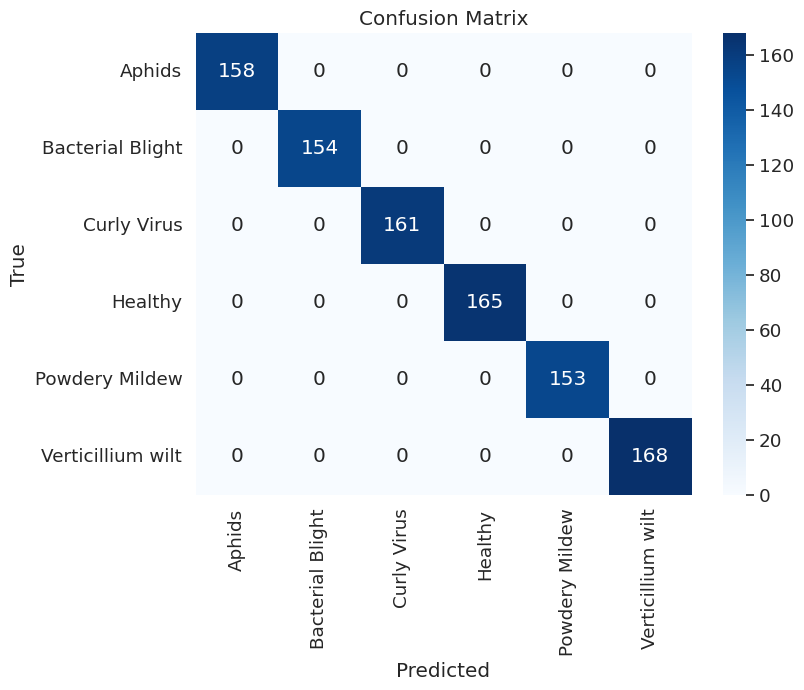

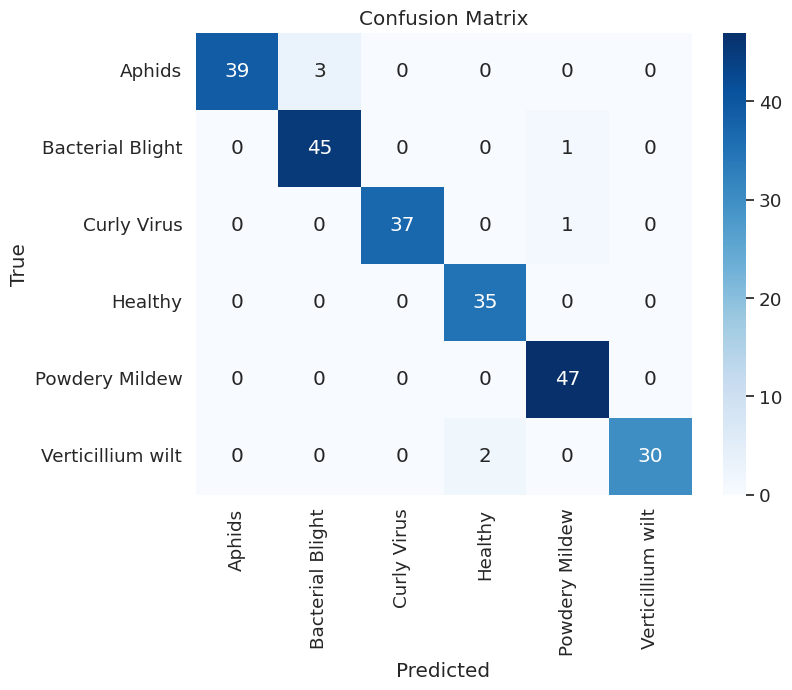

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# ... (previous code for predictions and metrics calculation) ...

# Define class names
class_names = ['Aphids','Bacterial Blight','Curly Virus','Healthy','Powdery Mildew','Verticillium wilt'] # Replace with your actual class names

# Create confusion matrix for training dataset
train_confusion = confusion_matrix(train_true_labels, train_pred_labels)

# Create confusion matrix for testing dataset
test_confusion = confusion_matrix(test_true_labels, test_pred_labels)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(
        cm,
        annot=True,
        cmap='Blues',  # You can choose other colormaps like 'viridis', 'coolwarm', etc.
        xticklabels=labels,
        yticklabels=labels,
        fmt='g'
    )
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix for training dataset
plot_confusion_matrix(train_confusion, class_names)

# Plot confusion matrix for testing dataset
plot_confusion_matrix(test_confusion, class_names)

In [ ]:
from tensorflow.keras.models import load_model
model4.save('model_vgg19.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 238ms/step
Predicted Disease: Verticillium wilt
Disease Scores: [[0.0000000e+00 0.0000000e+00 0.0000000e+00 3.5628237e-23 0.0000000e+00
  1.0000000e+00]]


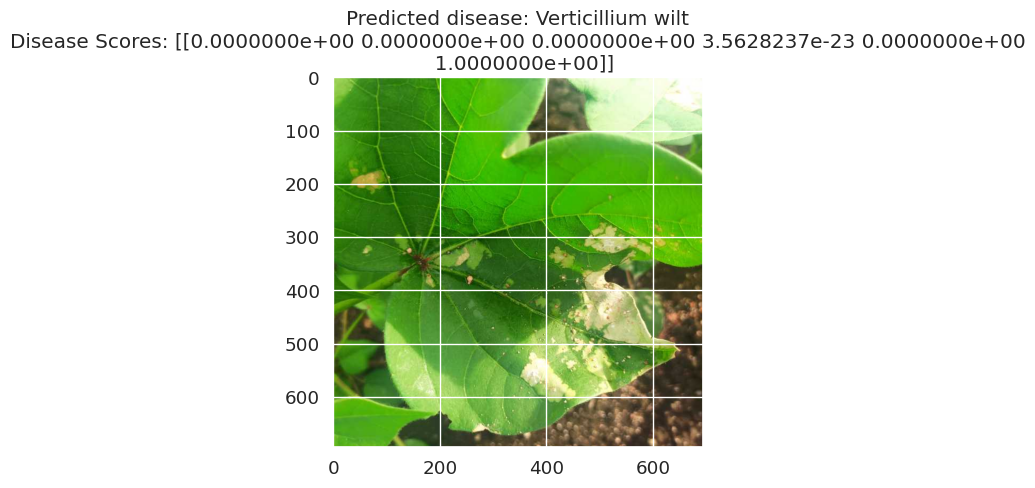

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load your pre-trained MobileNet model (or your custom model).
model = tf.keras.models.load_model('/content/model_vgg19.h5')  # Replace 'your_model_path.h5' with the path to your trained model.

# Define a dictionary to map class indices to human-readable emotion labels.
disease_labels = {
    0: "Aphids",
    1: "Bacterial Blight",
    2: "Curly Virus",
    3: "Healthy",
    4: "Powdery Mildew",
    5: "Verticillium wilt"
}

# Define a function to predict the emotion label and scores from an image file path.
def predict_disease(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # Resize the image to match the input size of your model.
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    predictions = model.predict(x)
    predicted_label = disease_labels[np.argmax(predictions)]  # Get the label with the highest score.
    return predicted_label, predictions

# Define a function to display the image, predicted emotion label, and scores.
def display_image_with_disease(image_path, predicted_label, predicted_disease_scores):
    img = image.load_img(image_path)
    plt.imshow(img)
    plt.title(f"Predicted disease: {predicted_label}\nDisease Scores: {predicted_disease_scores}")
    plt.show()

image_path = '/content/drive/MyDrive/Final_Dataset/Verticillium wilt/dis_leaf (185)_iaip.jpg'
predicted_label, predicted_disease_scores = predict_disease(image_path)
print("Predicted Disease:", predicted_label)
print("Disease Scores:", predicted_disease_scores)

# Display the image with predicted emotion label and scores.
display_image_with_disease(image_path, predicted_label, predicted_disease_scores)